In [4]:
from _tests import scripts
from scripts.notebook_utils import *

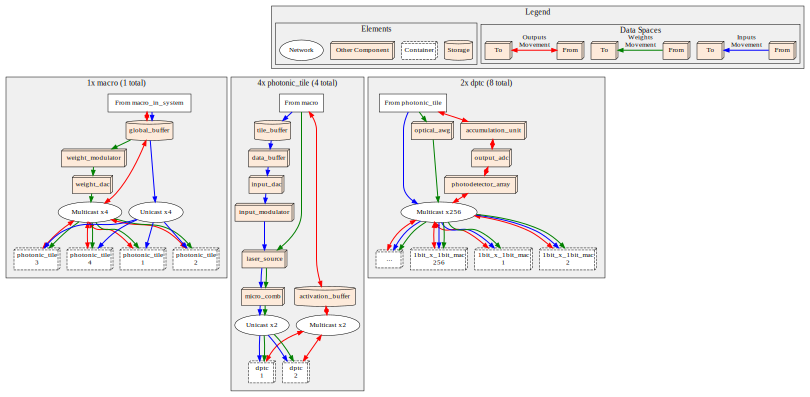

In [54]:
ARCH_PATH = "/home/workspace/models/arch/1_macro/lightening_ieee_2024/arch.yaml"
display_diagram(get_diagram("lightening_ieee_2024", ignore=DIAGRAM_DEFAULT_IGNORE))

In [49]:
ARCH_PATH = "/home/workspace/models/arch/1_macro/lightening_ieee_2024/arch.yaml"

def run_basic_analog_spec(array_rows: int, array_columns: int):
    spec = get_spec("lightening_ieee_2024")
    spec.variables["MAX_UTILIZATION"] = True
    return run_mapper(spec, "my_spec")


results = run_basic_analog_spec(array_rows=12, array_columns=12)
print(f"Total Energy (pJ): {results.energy:.2f}")
print(f"Total Area (mm^2): {results.area / 1000000:.2f}")
print(f"Number of MACs: {results.computes:.2f}")
print(f"Compute Density (TOPS/mm^2): {results.tops_per_mm2:.2f}")
print(f"Energy Efficiency (TOPS/W): {results.tops_per_w:.2f}")

RuntimeError: 

========================================================================================================================
Timeloop mapper failed with return code 0. Please check the output files in /home/workspace/scripts/../outputs/235.281473772778528 for more information. To debug, you can edit the file:
	/home/workspace/scripts/../outputs/235.281473772778528/parsed-processed-input.yaml
and run 
	tl mapper /home/workspace/scripts/../outputs/235.281473772778528/parsed-processed-input.yaml
to see the error. If you're running the mapper and Timeloop can't find a vaild mapping, try setting 'diagnostics: true' in the mapper input specification.

In [53]:
!tl mapper /home/workspace/scripts/../outputs/235.281473772778528/parsed-processed-input.yaml
!/usr/local/bin/accelergy /home/workspace/outputs/235.281473772778528/parsed-processed-input.yaml --oprefix timeloop-mapper.

Running apps: mapper
Found parsed-processed-input.yaml in input files. Running Timeloop without parsing or processing steps. If this is not the intended behavior, please name the input files differently.
input file: /home/workspace/outputs/235.281473772778528/parsed-processed-input.yaml
  _______                __                
 /_  __(_)___ ___  ___  / /___  ____  ____ 
  / / / / __ `__ \/ _ \/ / __ \/ __ \/ __ \
 / / / / / / / / /  __/ / /_/ / /_/ / /_/ /
/_/ /_/_/ /_/ /_/\___/_/\____/\____/ .___/ 
                                  /_/      

Problem configuration complete.
execute:/usr/local/bin/accelergy /home/workspace/outputs/235.281473772778528/parsed-processed-input.yaml --oprefix timeloop-mapper. -o ./ > timeloop-mapper.accelergy.log 2>&1
Failed to run Accelergy. Did you install Accelergy or specify ACCELERGYPATH correctly? Or check accelergy.log to see what went wrong
2025-04-09 03:19:12 INFO            _                _                      
2025-04-09 03:19:12 INFO      